In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import sys

In [4]:
byte_distr_prob = np.load("byte_prob_distr.npy")
print(byte_distr_prob.shape)

new_line = byte_distr_prob[:1000, 10]
comma = byte_distr_prob[:1000, 44]

print(new_line.shape, comma.shape)
input_set = np.vstack((new_line, comma)).T
print(input_set.shape)

(20426, 256)
(1000,) (1000,)
(1000, 2)


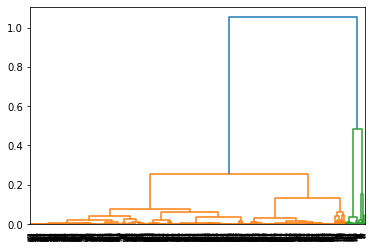

In [3]:
sys.setrecursionlimit(10000)
dendrogram = sch.dendrogram(sch.linkage(input_set, method='ward'))

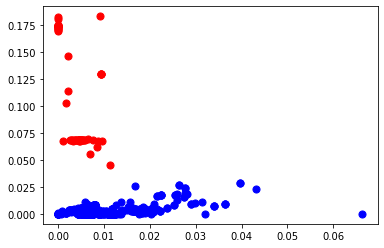

In [5]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward', compute_full_tree=True)
model.fit(input_set)
labels = model.labels_

X = input_set
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
#plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
#plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
#plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [26]:
print(labels)

[3 2 3 3 4 0 0 1 0 3 3 0 1 3 3 3 3 1 1 1 1 0 0 3 0 3 3 3 1 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]


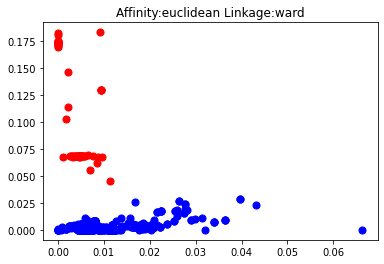

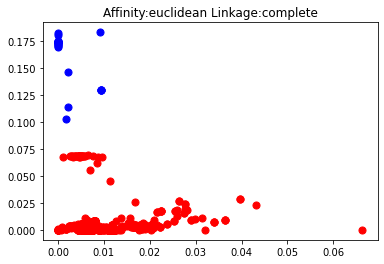

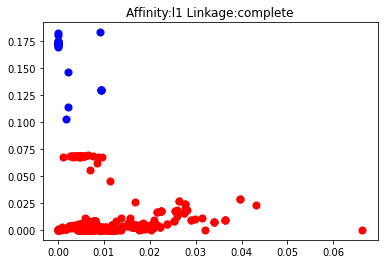

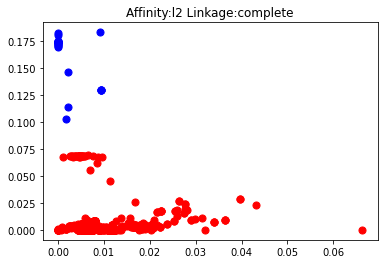

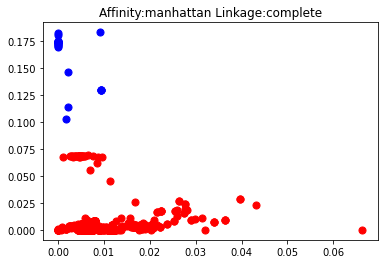

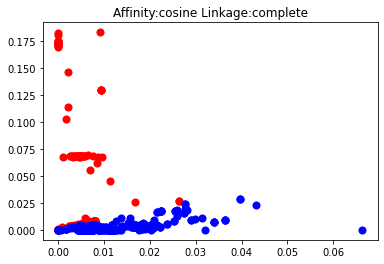

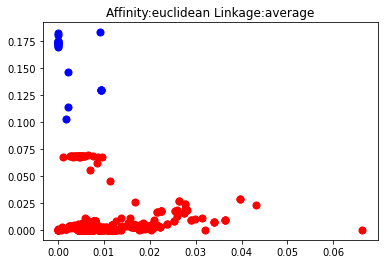

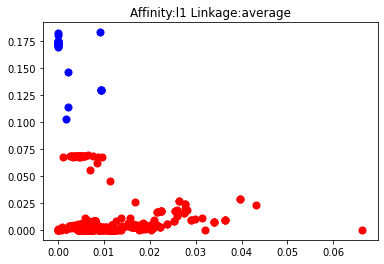

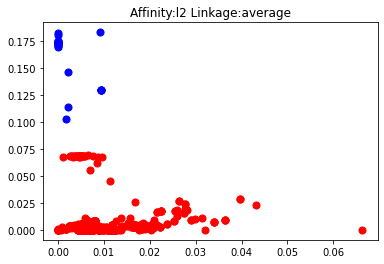

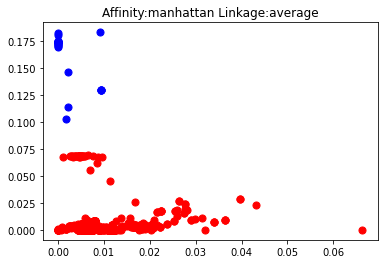

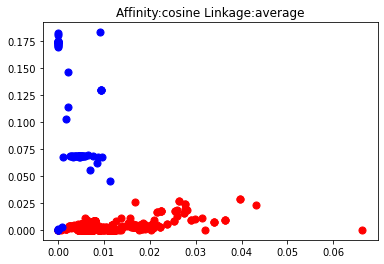

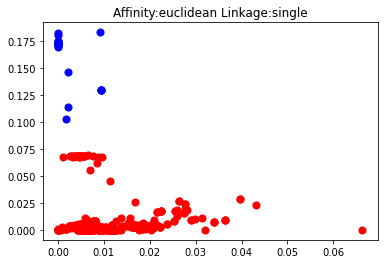

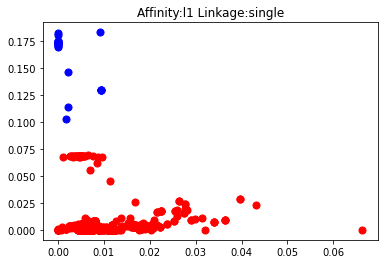

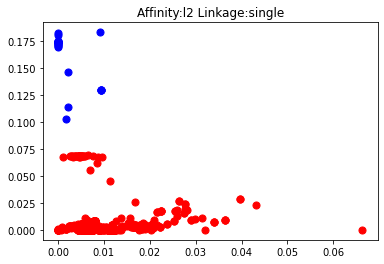

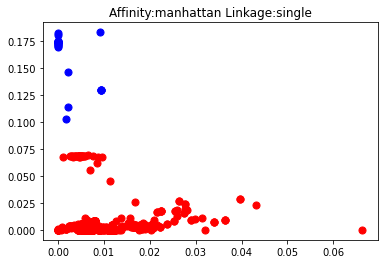

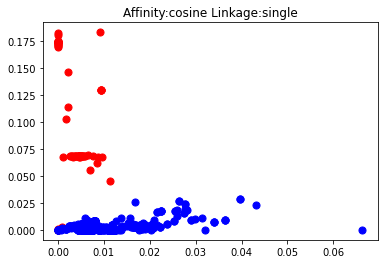

In [7]:
linkage = ['ward', 'complete', 'average', 'single']
affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

for method in linkage:
    if method == 'ward':
        affinities = ['euclidean']
    else:
        affinities = affinity
    for metric in affinities:
        model = AgglomerativeClustering(n_clusters=2, affinity=metric, linkage=method)
        model.fit(input_set)
        labels = model.labels_

        X = input_set
        plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
        plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')

        plt.title("Affinity:{af} Linkage:{m}".format(af=metric, m=method))
        plt.show()